In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [4]:
# Load the dataset
print("Loading TMDB 5000 Movies Dataset...")
movies_df = pd.read_csv(r"C:\Users\muthu\Downloads\movie recommender\tmdb_5000_movies.csv")
print(f"Dataset loaded successfully! Shape: {movies_df.shape}")

Loading TMDB 5000 Movies Dataset...
Dataset loaded successfully! Shape: (4803, 20)


In [5]:
# Display basic information about the dataset
print("\n=== Dataset Overview ===")
print(movies_df.info())

print("\n=== First few rows ===")
movies_df.head()



=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Analyze missing values
print("\n=== Missing Values Analysis ===")
missing_values = movies_df.isnull().sum()
missing_percentage = (missing_values / len(movies_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
}).sort_values('Missing Count', ascending=False)

print(missing_df)


=== Missing Values Analysis ===
                  Column  Missing Count  Missing Percentage
2               homepage           3091           64.355611
16               tagline            844           17.572351
7               overview              3            0.062461
13               runtime              2            0.041641
11          release_date              1            0.020820
3                     id              0            0.000000
0                 budget              0            0.000000
1                 genres              0            0.000000
6         original_title              0            0.000000
8             popularity              0            0.000000
5      original_language              0            0.000000
4               keywords              0            0.000000
10  production_countries              0            0.000000
9   production_companies              0            0.000000
14      spoken_languages              0            0.000000
12     

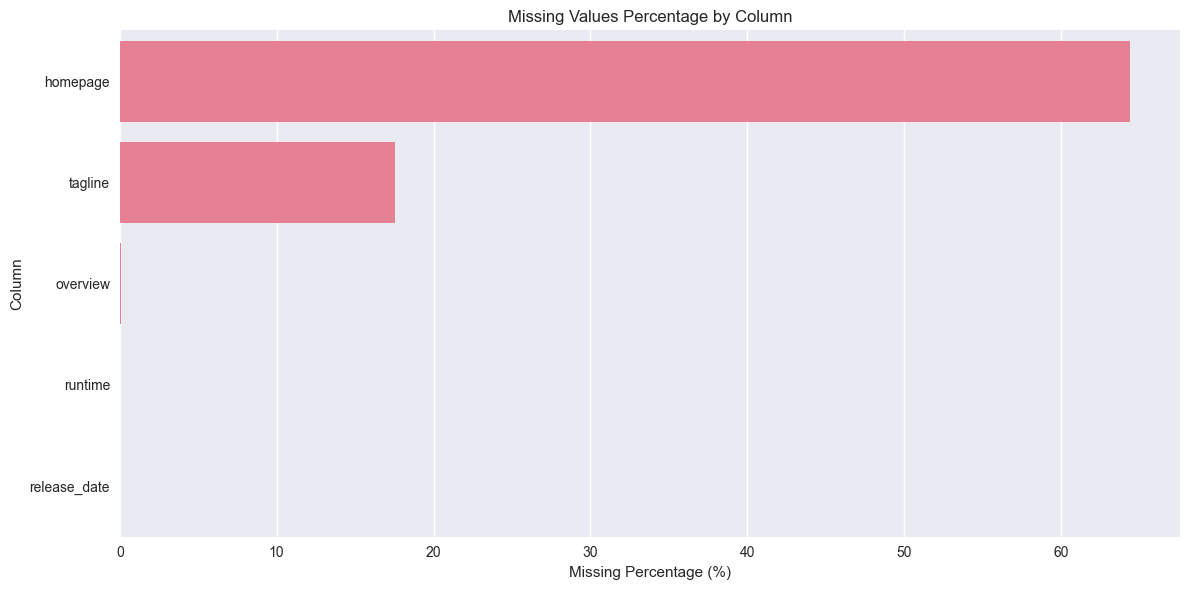

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_df[missing_df['Missing Count'] > 0], 
            x='Missing Percentage', y='Column')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

In [8]:

# Helper functions for data preprocessing
def safe_literal_eval(val):
    """Safely evaluate string representations of lists/dicts"""
    if pd.isna(val) or val == '':
        return []
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

In [9]:

def extract_names(data, key='name', limit=3):
    """Extract names from parsed JSON-like data"""
    if isinstance(data, list):
        return [item.get(key, '') for item in data[:limit] if isinstance(item, dict)]
    return []

In [10]:
# Preprocess the data
print("\n=== Data Preprocessing ===")


=== Data Preprocessing ===


In [11]:

# Handle missing values
movies_df = movies_df.fillna('')

In [12]:

# Parse JSON-like columns
json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
for col in json_columns:
    if col in movies_df.columns:
        print(f"Processing {col}...")
        movies_df[col] = movies_df[col].apply(safe_literal_eval)

Processing genres...
Processing keywords...
Processing production_companies...
Processing production_countries...
Processing spoken_languages...


In [13]:

print("Extracting features...")
movies_df['genre_names'] = movies_df['genres'].apply(lambda x: extract_names(x, 'name', 5))
movies_df['keyword_names'] = movies_df['keywords'].apply(lambda x: extract_names(x, 'name', 10))
movies_df['company_names'] = movies_df['production_companies'].apply(lambda x: extract_names(x, 'name', 3))

Extracting features...


In [14]:
# Create combined features for similarity calculation
movies_df['combined_features'] = (
    movies_df['genre_names'].apply(lambda x: ' '.join(x) if x else '') + ' ' +
    movies_df['keyword_names'].apply(lambda x: ' '.join(x) if x else '') + ' ' +
    movies_df['overview'].fillna('') + ' ' +
    movies_df['company_names'].apply(lambda x: ' '.join(x) if x else '')
)

print("Preprocessing completed!")

Preprocessing completed!


In [15]:
# Exploratory Data Analysis
print("\n=== Exploratory Data Analysis ===")


=== Exploratory Data Analysis ===


In [16]:
# Basic statistics
print("Basic Statistics:")
print(movies_df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']].describe())

Basic Statistics:
             budget       revenue  vote_average    vote_count   popularity
count  4.803000e+03  4.803000e+03   4803.000000   4803.000000  4803.000000
mean   2.904504e+07  8.226064e+07      6.092172    690.217989    21.492301
std    4.072239e+07  1.628571e+08      1.194612   1234.585891    31.816650
min    0.000000e+00  0.000000e+00      0.000000      0.000000     0.000000
25%    7.900000e+05  0.000000e+00      5.600000     54.000000     4.668070
50%    1.500000e+07  1.917000e+07      6.200000    235.000000    12.921594
75%    4.000000e+07  9.291719e+07      6.800000    737.000000    28.313505
max    3.800000e+08  2.787965e+09     10.000000  13752.000000   875.581305


In [17]:
# Most common genres
all_genres = []
for genre_list in movies_df['genre_names']:
    all_genres.extend(genre_list)

genre_counts = pd.Series(all_genres).value_counts().head(15)
print(f"\nTop 15 Most Common Genres:")
print(genre_counts)


Top 15 Most Common Genres:
Drama              2297
Comedy             1722
Thriller           1259
Action             1153
Romance             890
Adventure           790
Crime               696
Science Fiction     530
Horror              519
Family              510
Fantasy             418
Mystery             347
Animation           234
History             197
Music               183
Name: count, dtype: int64


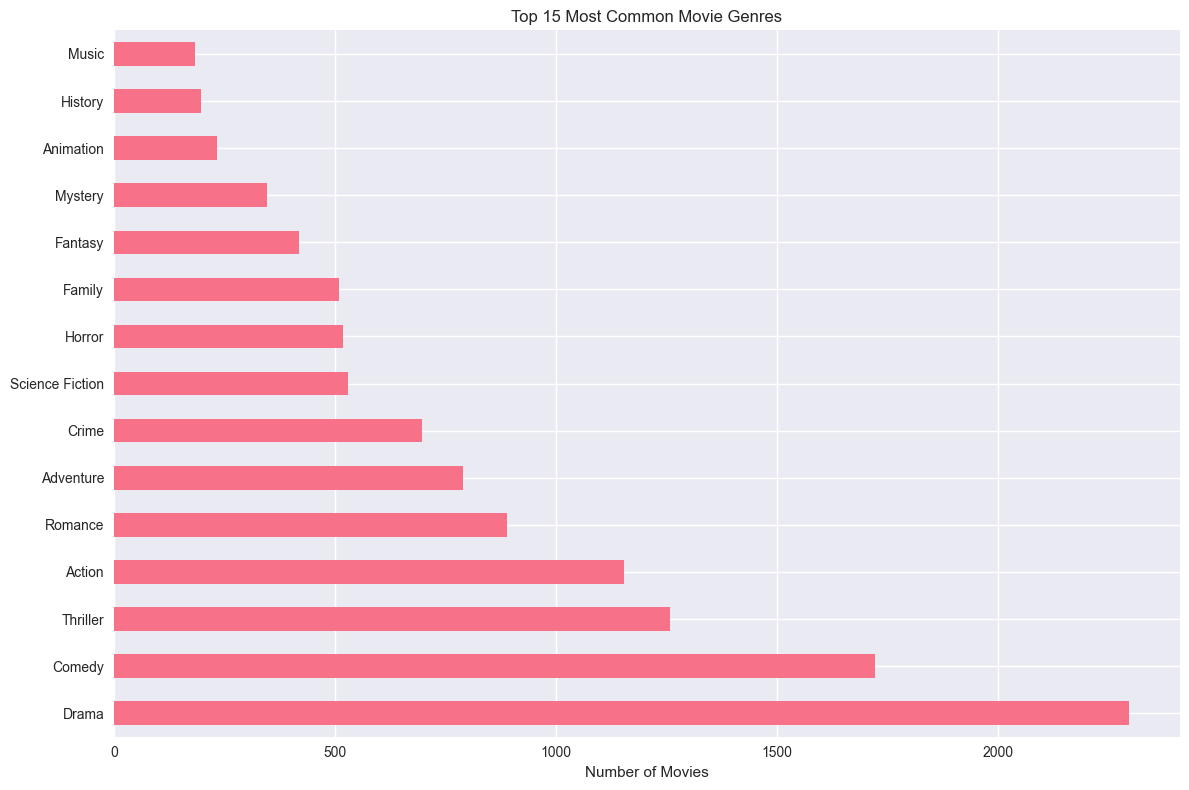

In [18]:
# Visualize genre distribution
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='barh')
plt.title('Top 15 Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.tight_layout()
plt.show()

<Axes: >

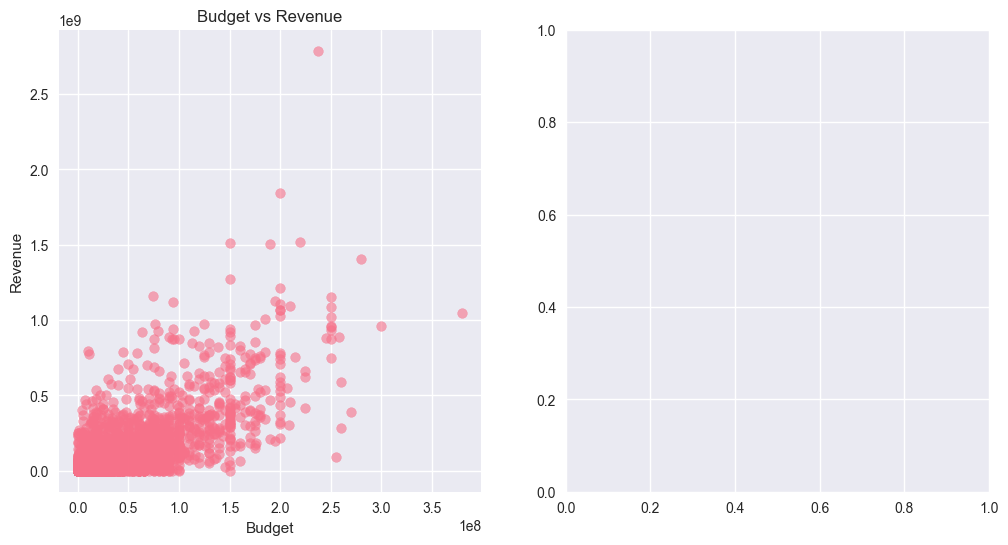

In [20]:
# Revenue vs Budget analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(movies_df['budget'], movies_df['revenue'], alpha=0.6)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.subplot(1, 2, 2)

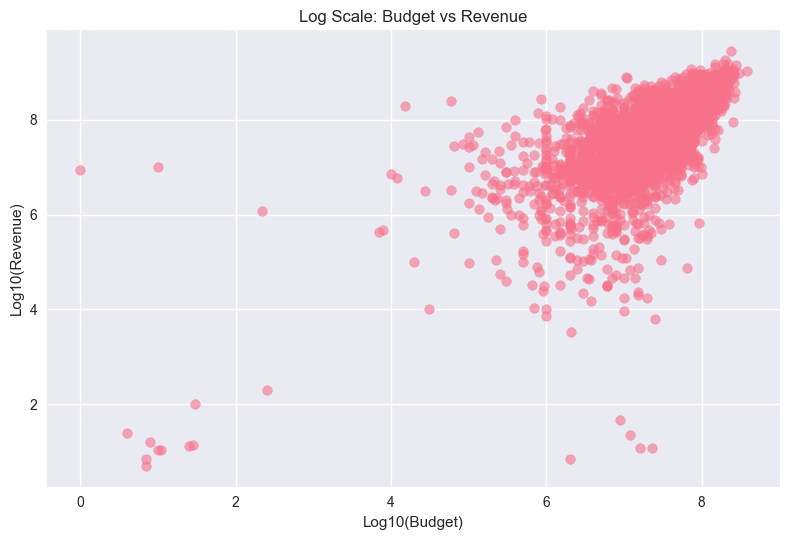

In [21]:
# Filter out zero budgets for better visualization
valid_budget = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]
plt.scatter(np.log10(valid_budget['budget']), np.log10(valid_budget['revenue']), alpha=0.6)
plt.xlabel('Log10(Budget)')
plt.ylabel('Log10(Revenue)')
plt.title('Log Scale: Budget vs Revenue')
plt.tight_layout()
plt.show()

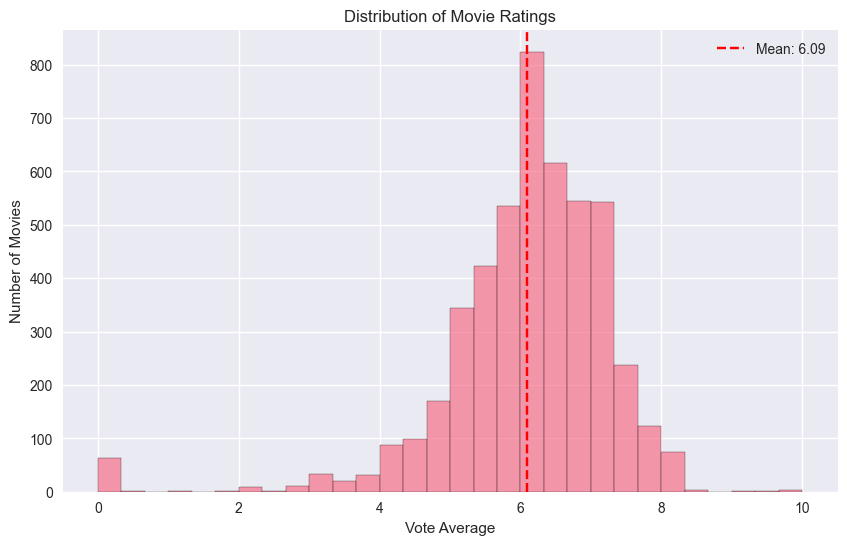

In [22]:
# Vote average distribution
plt.figure(figsize=(10, 6))
plt.hist(movies_df['vote_average'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.axvline(movies_df['vote_average'].mean(), color='red', linestyle='--', 
            label=f'Mean: {movies_df["vote_average"].mean():.2f}')
plt.legend()
plt.show()

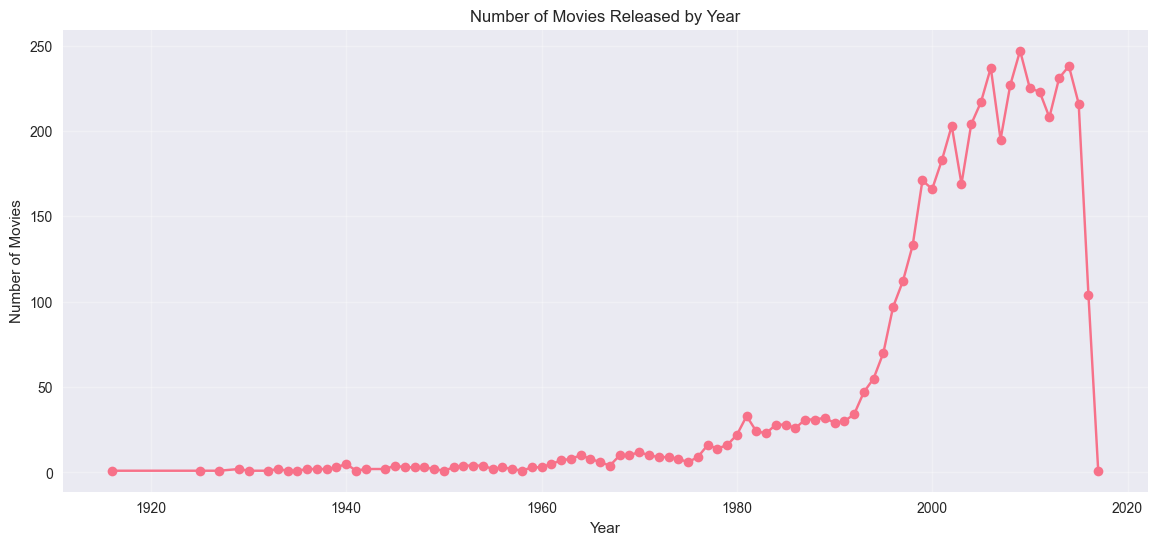

In [23]:

# Release year analysis
movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
yearly_counts = movies_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# Building the Recommendation System
print("\n=== Building Recommendation System ===")


=== Building Recommendation System ===


In [25]:
# Create TF-IDF matrix
print("Creating TF-IDF matrix...")
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, lowercase=True)
tfidf_matrix = tfidf.fit_transform(movies_df['combined_features'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

Creating TF-IDF matrix...
TF-IDF matrix shape: (4803, 5000)


In [26]:
# Calculate cosine similarity
print("Calculating cosine similarity matrix...")
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

Calculating cosine similarity matrix...
Cosine similarity matrix shape: (4803, 4803)


In [27]:
# Function to get recommendations
def get_movie_recommendations(title, cosine_sim=cosine_sim, num_recommendations=10):
    """Get movie recommendations based on title"""
    try:
        # Find the movie index
        idx = movies_df[movies_df['title'].str.lower() == title.lower()].index
        
        if len(idx) == 0:
            # Try partial matching
            partial_matches = movies_df[movies_df['title'].str.lower().str.contains(title.lower(), na=False)]
            if len(partial_matches) == 0:
                return f"Movie '{title}' not found in database"
            idx = partial_matches.index[0]
            print(f"Partial match found: {movies_df.iloc[idx]['title']}")
        else:
            idx = idx[0]
        
        # Get similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get top recommendations (excluding the movie itself)
        movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
        
        recommendations = movies_df.iloc[movie_indices][['title', 'vote_average', 'release_date', 'overview']]
        recommendations['similarity_score'] = [sim_scores[i+1][1] for i in range(num_recommendations)]
        
        return recommendations
        
    except Exception as e:
        return f"Error: {str(e)}"

In [28]:
# Test the recommendation system
print("\n=== Testing Recommendation System ===")

test_movies = ['Avatar', 'The Dark Knight', 'Inception', 'Titanic']

for movie in test_movies:
    print(f"\n--- Recommendations for '{movie}' ---")
    recommendations = get_movie_recommendations(movie, num_recommendations=5)
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        for idx, row in recommendations.iterrows():
            print(f"{row['title']} ({row['release_date'][:4] if pd.notna(row['release_date']) else 'N/A'}) - "
                  f"Rating: {row['vote_average']}, Similarity: {row['similarity_score']:.3f}")


=== Testing Recommendation System ===

--- Recommendations for 'Avatar' ---
Aliens (1986) - Rating: 7.7, Similarity: 0.363
Moonraker (1979) - Rating: 5.9, Similarity: 0.358
Spaceballs (1987) - Rating: 6.7, Similarity: 0.347
Mission to Mars (2000) - Rating: 5.7, Similarity: 0.337
Alien³ (1992) - Rating: 6.2, Similarity: 0.322

--- Recommendations for 'The Dark Knight' ---
The Dark Knight Rises (2012) - Rating: 7.6, Similarity: 0.494
Batman Begins (2005) - Rating: 7.5, Similarity: 0.456
Batman Returns (1992) - Rating: 6.6, Similarity: 0.400
Batman (1989) - Rating: 7.0, Similarity: 0.370
Batman v Superman: Dawn of Justice (2016) - Rating: 5.7, Similarity: 0.358

--- Recommendations for 'Inception' ---
Cypher (2002) - Rating: 6.7, Similarity: 0.173
The Helix... Loaded (2005) - Rating: 4.8, Similarity: 0.155
Pitch Perfect 2 (2015) - Rating: 6.8, Similarity: 0.145
Duplex (2003) - Rating: 5.9, Similarity: 0.144
The Count of Monte Cristo (2002) - Rating: 7.3, Similarity: 0.138

--- Recommenda

In [29]:
# Analyze recommendation quality
print("\n=== Recommendation Quality Analysis ===")


=== Recommendation Quality Analysis ===


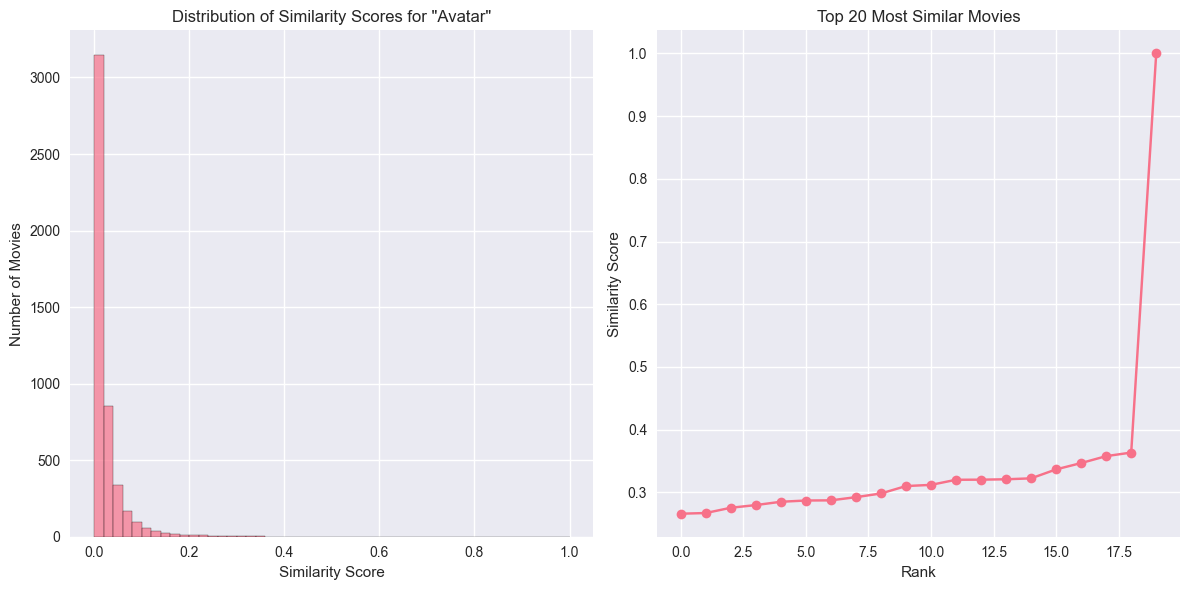

In [30]:
# Sample similarity scores for visualization
sample_movie = 'Avatar'
try:
    idx = movies_df[movies_df['title'].str.lower() == sample_movie.lower()].index[0]
    similarity_scores = cosine_sim[idx]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(similarity_scores, bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Similarity Score')
    plt.ylabel('Number of Movies')
    plt.title(f'Distribution of Similarity Scores for "{sample_movie}"')
    
    plt.subplot(1, 2, 2)
    top_similar = np.sort(similarity_scores)[-20:]
    plt.plot(range(len(top_similar)), top_similar, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Similarity Score')
    plt.title('Top 20 Most Similar Movies')
    plt.tight_layout()
    plt.show()
    
except:
    print(f"Could not analyze similarity for {sample_movie}")


In [31]:

# Feature importance analysis
print("\n=== Feature Analysis ===")


=== Feature Analysis ===


In [32]:
# Get feature names
feature_names = tfidf.get_feature_names_out()
print(f"Total features extracted: {len(feature_names)}")

Total features extracted: 5000


In [33]:
# Sample of most important features
sample_tfidf = tfidf_matrix[0].toarray().flatten()
top_features_idx = np.argsort(sample_tfidf)[-20:]
top_features = [(feature_names[i], sample_tfidf[i]) for i in top_features_idx if sample_tfidf[i] > 0]

if top_features:
    print("\nSample of important features for first movie:")
    for feature, score in reversed(top_features):
        print(f"{feature}: {score:.4f}")


Sample of important features for first movie:
space: 0.5154
alien: 0.2530
century: 0.1998
dispatched: 0.1935
protecting: 0.1845
civilization: 0.1777
pandora: 0.1762
orders: 0.1762
colony: 0.1748
futuristic: 0.1723
unique: 0.1667
moon: 0.1658
clash: 0.1658
torn: 0.1648
culture: 0.1575
ingenious: 0.1555
marine: 0.1491
following: 0.1491
dune: 0.1426
society: 0.1395


In [34]:
# Performance metrics
print("\n=== Performance Metrics ===")


=== Performance Metrics ===


Average similarity score across movies: 0.0194
Standard deviation of similarities: 0.0037


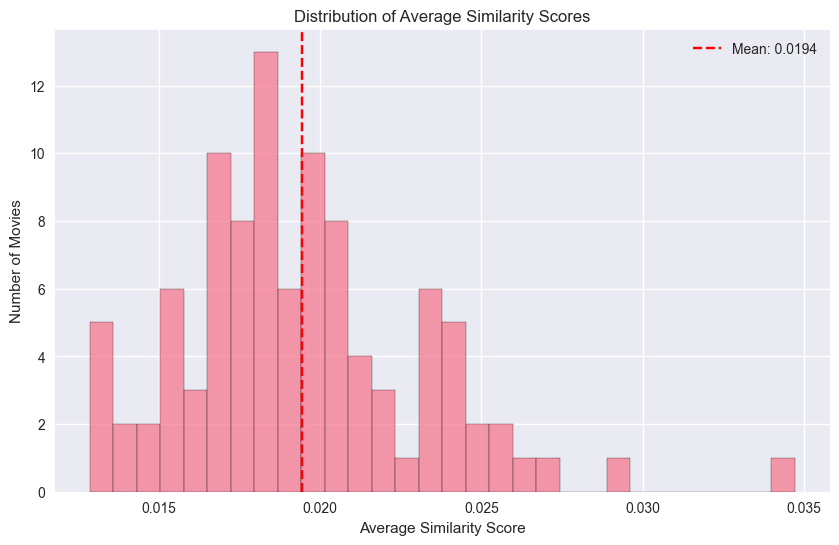

In [35]:
# Calculate average similarity scores
avg_similarities = []
for i in range(min(100, len(movies_df))):  # Sample first 100 movies
    similarities = cosine_sim[i]
    # Exclude self-similarity (which is 1.0)
    similarities = similarities[similarities < 1.0]
    avg_similarities.append(np.mean(similarities))

print(f"Average similarity score across movies: {np.mean(avg_similarities):.4f}")
print(f"Standard deviation of similarities: {np.std(avg_similarities):.4f}")

plt.figure(figsize=(10, 6))
plt.hist(avg_similarities, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Average Similarity Score')
plt.ylabel('Number of Movies')
plt.title('Distribution of Average Similarity Scores')
plt.axvline(np.mean(avg_similarities), color='red', linestyle='--', 
            label=f'Mean: {np.mean(avg_similarities):.4f}')
plt.legend()
plt.show()

In [36]:
# Dimensionality reduction for visualization
print("\n=== Dimensionality Reduction Visualization ===")


=== Dimensionality Reduction Visualization ===


Applying PCA for visualization...


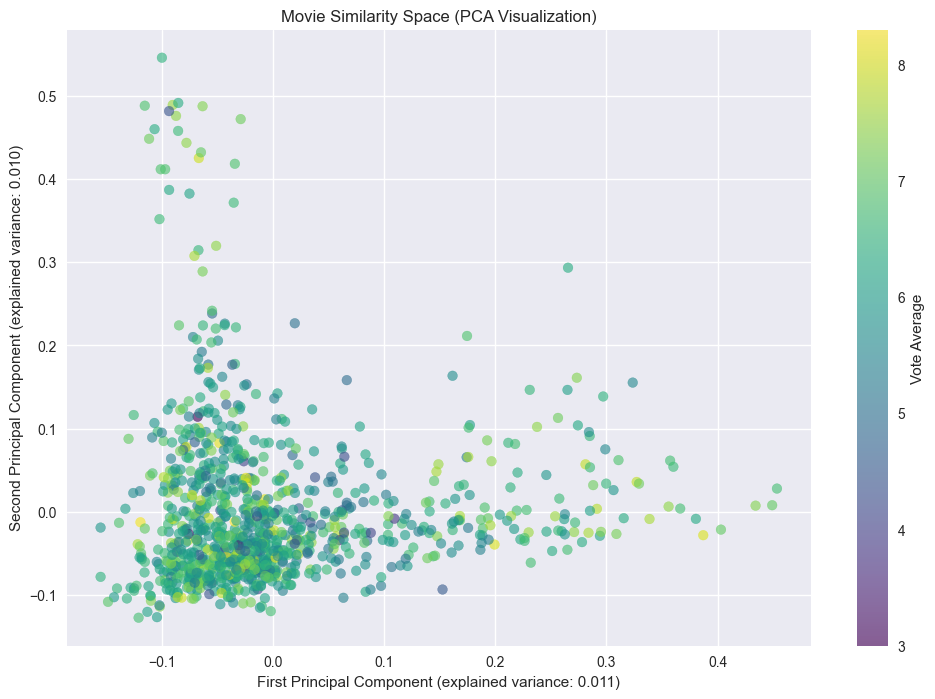

In [37]:
# Use PCA to reduce dimensions for visualization
print("Applying PCA for visualization...")
pca = PCA(n_components=2)
tfidf_dense = tfidf_matrix.toarray()
pca_result = pca.fit_transform(tfidf_dense[:1000])  # Use first 1000 movies for speed

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                     c=movies_df['vote_average'][:1000], 
                     cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Vote Average')
plt.xlabel(f'First Principal Component (explained variance: {pca.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'Second Principal Component (explained variance: {pca.explained_variance_ratio_[1]:.3f})')
plt.title('Movie Similarity Space (PCA Visualization)')
plt.show()

In [38]:
print(f"Total explained variance by first 2 components: {sum(pca.explained_variance_ratio_):.3f}")

Total explained variance by first 2 components: 0.020


In [39]:
# Save processed data for the Flask app
print("\n=== Saving Processed Data ===")
print("Data preprocessing complete!")
print("The Flask application will load and process the data when started.")


=== Saving Processed Data ===
Data preprocessing complete!
The Flask application will load and process the data when started.


In [40]:

# Summary
print("\n=== Summary ===")
print(f"✅ Successfully loaded {len(movies_df)} movies")
print(f"✅ Created TF-IDF matrix with {tfidf_matrix.shape[1]} features")
print(f"✅ Built cosine similarity matrix for recommendations")
print(f"✅ Tested recommendation system with sample movies")
print(f"✅ Average similarity score: {np.mean(avg_similarities):.4f}")
print("\n🎬 Movie recommendation system is ready for deployment!")


=== Summary ===
✅ Successfully loaded 4803 movies
✅ Created TF-IDF matrix with 5000 features
✅ Built cosine similarity matrix for recommendations
✅ Tested recommendation system with sample movies
✅ Average similarity score: 0.0194

🎬 Movie recommendation system is ready for deployment!
